# Classification task using a perceptron

Create a dataset with three classes, each class has N objects, represented by two variables X1 and X2 according to the following requirements:

+ N is equal to 100
+ X1 is distributed:
    1. for class 1, a normal distribution with mean -1 and standard deviation 0.5
    2. for class 2, a normal distribution with mean 2.5 and standard deviation 1
    3. for class 3, a normal distribution with mean 4 and standard deviation 1
+ X2 is distributed:
    1. for class 1, an exponential distribution with scale parameter 3
    2. for class 2, a lognormal distribution with mean 0.5 and standard deviation 0.5
    3. for class 3, a Poisson distribution with lambda 2.0 plus a constant equal to 5

Each object has a label y attached (1, 2, or 3).

In [3]:
import numpy as np

np.random.seed(123)

# write your code here

N = 100

X1_1 = np.random.normal(loc=-1.0, scale=0.5, size=N)
X1_2 = np.random.normal(loc=2.5, scale=1, size=N)
X1_3 = np.random.normal(loc=4, scale=1, size=N)

X2_1 = np.random.exponential(scale=3, size=N)
X2_2 = np.random.lognormal(mean=0.5, sigma=0.5, size=N)
X2_3 = np.random.poisson(lam=2, size=N) + 5

y1 = np.ones(N)
y2 = np.ones(N) * 2
y3 = np.ones(N) * 3


## Plot the points

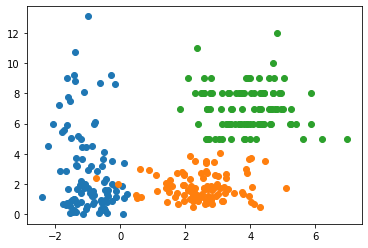

In [4]:
import matplotlib.pyplot as plt

# write your code here

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
plt.scatter(X1_3, X2_3)


## Create data matrix

Create a matrix of points X (each row is an object) and a vector y of labels. Remember that we need the coordinate X0 for the bias term (all ones).

In [5]:
# Write your code here

X0 = np.ones(3 * N)
X1 = np.concatenate((X1_1, X1_2, X1_3))
X2 = np.concatenate((X2_1, X2_2, X2_3))
y = np.concatenate((y1, y2, y3))

X = np.stack((X0, X1, X2), axis=1)


## Choose category 

We want to train a binary classifier for class 3. To this purpose, create a vector of labels y_class that contains 1 for each object belonging to the class under study (positive class) and -1 to all the other objects.


In [7]:
# Write your code here

positive_class = 3
y_class = -np.ones(y.shape[0])
y_class[y == positive_class] = 1


### Plot this binary problem

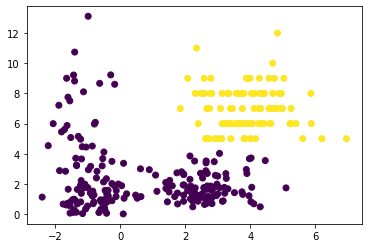

In [8]:
# Write your code here

plt.scatter(X[:, 1], X[:, 2], c=y_class)


## Define the Sum of squares error function

Write the function sse(X, y, w) that takes the data matrix X, the labels y, and the vector of paraterers w and computes the error in terms of sum of squares.

In [9]:
# Write your code here

def sse(X, y, w):
    return 0.5 * np.sum(np.square(y - np.dot(X, w)))


## Train the perceptron with a mini-batch stochastic gradient descent

Set the values of the vector of parameters w with values drawn from a uniform distribution within the range \[-1. 1\].
Use a learning parameter eta equal to 1e-5 and a batch size of 10 objects. Set the maximum number of epochs to 100.
Save in the vector sse_epoch, the values of the sum of squares error for each epoch. Save in the vector errors_epoch, the number of objects misclassified at each epoch.
Remember to shuffle the dataset at each epoch.

total error = 37.46875645739415
number of errors = 9.0


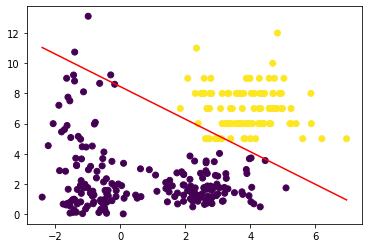

In [10]:
# Write your code here

w = np.random.uniform(low=-1, high=1, size=3)
eta = 1e-3
batch_size = 10
max_epochs = 100
sse_epoch = np.zeros(max_epochs + 1)
errors_epoch = np.zeros(max_epochs + 1)

for epoch in range(max_epochs):
    sse_epoch[epoch] = sse(X, y_class, w)
    errors_epoch[epoch] = sum(y_class * np.sign(np.dot(X, w)) < 0)

    rand_perm = np.random.permutation(y.shape[0])
    X = X[rand_perm, :]
    y_class = y_class[rand_perm]

    for j in range(0, y_class.shape[0], batch_size):
        x_batch = X[j:j + batch_size, :]
        y_batch = y_class[j:j + batch_size]

        errors = y_batch - np.dot(x_batch, w)
        w += eta * np.dot(np.transpose(x_batch), errors)

sse_epoch[epoch + 1] = sse(X, y_class, w)
errors_epoch[epoch + 1] = sum(y_class * np.sign(np.dot(X, w)) < 0)

print(f"total error = {sse_epoch[-1]}")
print(f"number of errors = {errors_epoch[-1]}")

plt.scatter(X[:, 1], X[:, 2], c=y_class)
plt.plot([np.min(X[:, 1]), np.max(X[:, 1])],
         [np.min(X[:, 1]) * (-w[1] / w[2]) - w[0] / w[2],
          np.max(X[:, 1]) * (-w[1] / w[2]) - w[0] / w[2]],
         c="red")


## Plot number of errors per epoch

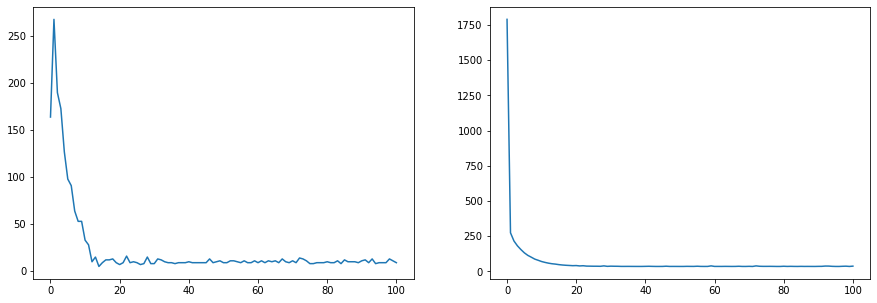

In [11]:
# Write your code here

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].plot(range(sum(errors_epoch > 0)), errors_epoch[errors_epoch > 0])
axs[1].plot(range(sum(errors_epoch > 0)), sse_epoch[errors_epoch > 0])


# Polynomial regression task

In this exercies, we will reuse the coordinate X1 to create a regression problem. The output Y (the "oracle" target function) is a cubic function aX^3 + bX^2 + cX + d with values a = -1, b = 2, c = -3, d = 4. Moreover, we sum some randome noise with a gaussian distribution (mean zero, standard deviation 2.5).

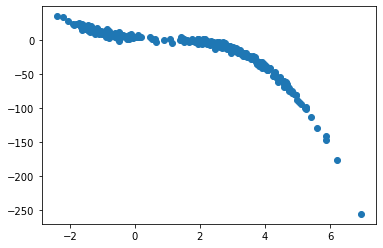

In [17]:
#Write your code here
Y = - X1**3 + 2 * X1**2 - 3 * X1 + 4 + np.random.normal(loc=0, scale=2.5, size=3 * N)
plt.scatter(X1, Y)

## Create data matrix
Suppose that your hypohtesis is a quadratic function, generate the data matrix accordingly (remember the X0) and save it into the variable X_reg.

In [14]:
#Write your code here

X_reg = np.stack((X0, X1, X1**2), axis=1)


## Find the optimal vector of parameters
In this case, we will try to find the optimal w using the closed form.

In [24]:
#Write your code here

w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_reg), X_reg)), np.transpose(X_reg)), Y)
w

array([18.01584588, -0.12881551, -4.0247037 ])

## Check the curvature of the solution

Why does this solution look like a line? Try to plot the parabola and think about the reasons of this shape.

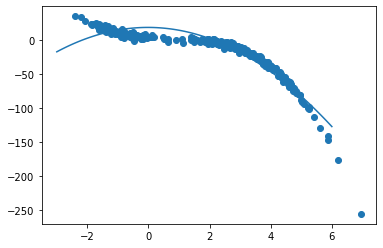

In [25]:
#Write your code here

x_grid = np.linspace(start=-3, stop=6, num=100)
y_grid = w[0] + w[1] * x_grid + w[2] * x_grid**2

plt.plot(x_grid, y_grid)
plt.scatter(X1, Y)